<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/ml_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
* **AI**
 * **Machine Learning** (ML) - the set of all tasks in which a computer can make decisions *based on data*.
   * **Deep Learning** (DL) - ML using neuro-net

**Reinforcement Learning (RL)** - ML in which no data is given, agent learns to perform task by interacting with env.

## Definitions:
* **Model** - rules on data and used to make predictions
* **Algorithm** - used to build the model
* **Feature** - data properties/characteristics that model uses for prediction
* **Label** - target feature of the prediction.
* **Predictions** - output of the model.
* **weights** - in the model formula, each feature is multiplied wby a corresponding factor (weight)
* **bias** - in the model formula, constant that is not attached to any features.

## Types of models and algorithms:
* **Supervised learning** - ML that works with labeled data. Supervised learning models:
  * **regression model** - predicts numerical data (outputs number)
  * **classification model** - predicts category (outputs category)
* **Unsupervised learning** - ML that works with unlabeled data. Unsupervised learning algos:
  * **clustering algos** - group data into clusters based on similarity. e.g.
    * **K-means clustering** - groups points by picking some random centers of mass and move them closer and closer to the points till the are at the right spots
    * **Hierarchical clustering** - starts by grouping the closest points together and continueing till we have some well-defined groups
    * **Density-based spatial clustering (DBSCAN)** - starts grouping points in places with high density, while labeling the isolated points as noise.
    * **Gaussian mixtrue models** - assignes fractions of the point to each of the existing clusters.
  * **dimentionality reduction** algos - similify data and faithfully describe it with fewer features
  * combination of clustering and dimensionality reduction. They express big matrix of data into product of smaller matrices
    * **Matrix factorization** - e.g. movie recommendation
    * **Single value decomposition** - uses linear algebra, e.g. image compression
  * **generative algos** - generate new data points that resemble the existing data
    * **Generative adversarial networks (GANs)**
    * **Variational autoencoders (VAEs)**
    * **Restricted Boltzmann machines (RBMs)**






In [8]:
!rm -f data/*
!wget -nv -P data https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_03_Linear_Regression/Hyderabad.csv
!ls -al data
!wc -l data/Hyderabad.csv

2025-02-16 23:43:37 URL:https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_03_Linear_Regression/Hyderabad.csv [253067/253067] -> "data/Hyderabad.csv" [1]
total 256
drwxr-xr-x 2 root root   4096 Feb 16 23:43 .
drwxr-xr-x 1 root root   4096 Feb 16 23:41 ..
-rw-r--r-- 1 root root 253067 Feb 16 23:43 Hyderabad.csv
2518 data/Hyderabad.csv


In [13]:
import random
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X, y)
    plt.xlabel('number of rooms')
    plt.ylabel('prices')

# Linear Regression
Drawing a line close to the data points. Start with random values for slope and y-intercept, rotate/move line based on formulae many times till it fits the points well. Each interation is called an **epoch**.

In the house price example:
* $p$: the price of a house in the dataset
* $\hat p$: the predicted price of a house
* $r$: number of rooms
* $m$: price per room
* $b$: base price of a house (bias?)

The linear regression model to predict house price: $\hat p=mr + b$

In [21]:
# square trick - we use p-p_hat and r to reduce 4 cases into 1.
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
  # p_hat = b + mr
  predicted_price = base_price + price_per_room * num_rooms
  # add lr*(p-p_hat) to b and obtain new b'
  base_price += learning_rate * (price - predicted_price)
  # add lr*r*(p-p_hat) to slope to get new m'. The r is used here because it provides
  # the sign (+/-). So the r(p-p_hat) always gives the right sign.
  price_per_room += learning_rate * num_rooms * (price-predicted_price)

  return price_per_room, base_price

# absolute trick - it's an intermediate between simple and square tricks
# here we only use r to reduce 4 cases into 2.
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
  # p_hat = b + mr
  predicted_price = base_price + price_per_room * num_rooms
  if price > predicted_price: # p is above the line
    m += learning_rate * num_rooms # rotate line anti-clockwise
    base_price += learning_rate # move line up
  else: # p is below the line
    m -= learning_rate * num_rooms # rotate line clockwise
    base_price -= learning_rate # move line down

  return price_per_room, base_price


# linear regression algo using square trick
def linear_regression(features,  #1-D array of numbers of rooms
                      labels,   # 1-D array of house prices
                      learning_rate=0.01, epochs=1000):
  ms, bs = [0.0] * epochs, [0.0] * epochs
  price_per_room = random.random() # float
  base_price = random.random()
  for epoch in range(epochs):
    i = random.randint(0, len(features)-1) # random index of dataset
    num_rooms = features[i]
    price = labels[i]
    price_per_room, base_price = square_trick(base_price, price_per_room,
                                              num_rooms, price, learning_rate)
    ms[epoch] = price_per_room
    bs[epoch] = base_price
  return ms, bs # price_per_room, base_price

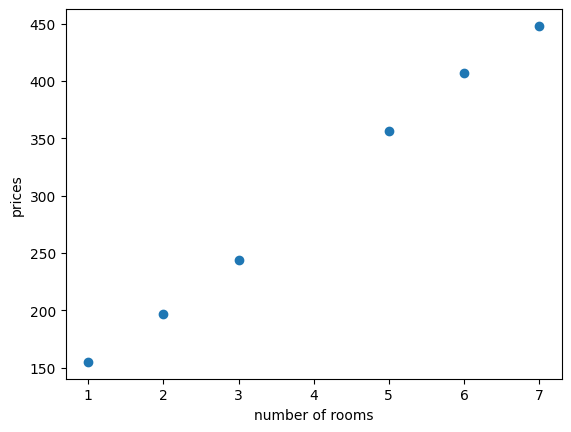

In [16]:
# load the data and plot them
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356, 407, 448])
plot_points(features, labels)

base price=99.72380103536338, price per room=50.14981621238424


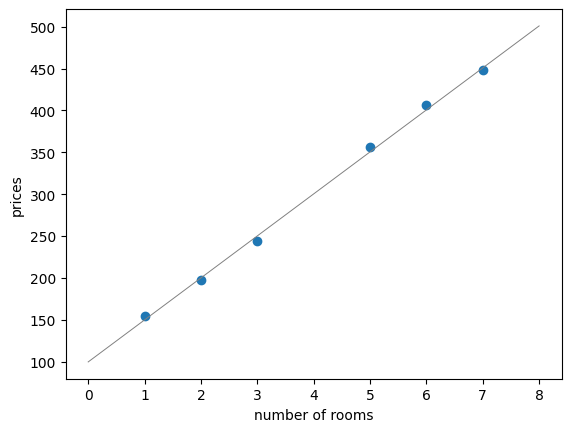

In [77]:
# apply the linear regression on the data
epochs = 10000
ms, bs = linear_regression(features, labels, learning_rate=0.01, epochs=epochs)
m, b = ms[-1], bs[-1]
print(f"base price={b}, price per room={m}")
plot_points(features, labels)
draw_line(m, b)

In [73]:
# linspace is no good because the 1st 50 epochs are where most changes happen
TOTAL_FRAMES=50
frames = np.linspace(0, epochs, TOTAL_FRAMES, dtype=np.uint32)
frames, len(frames)

(array([    0,   204,   408,   612,   816,  1020,  1224,  1428,  1632,
         1836,  2040,  2244,  2448,  2653,  2857,  3061,  3265,  3469,
         3673,  3877,  4081,  4285,  4489,  4693,  4897,  5102,  5306,
         5510,  5714,  5918,  6122,  6326,  6530,  6734,  6938,  7142,
         7346,  7551,  7755,  7959,  8163,  8367,  8571,  8775,  8979,
         9183,  9387,  9591,  9795, 10000], dtype=uint32),
 50)

In [75]:
# so I use logspace instead to show more epochs at the beginning
# I also want to show epoch 0, so hardcode it into the frames[]
frames = np.logspace(0, np.log10(epochs), TOTAL_FRAMES, dtype=np.uint32)
frames[:2] = 0
frames, len(frames)

(array([    0,     0,     1,     1,     2,     2,     3,     3,     4,
            5,     6,     7,     9,    11,    13,    16,    20,    24,
           29,    35,    42,    51,    62,    75,    91,   109,   132,
          159,   193,   232,   281,   339,   409,   494,   596,   719,
          868,  1048,  1264,  1526,  1842,  2222,  2682,  3237,  3906,
         4714,  5689,  6866,  8286, 10000], dtype=uint32),
 50)

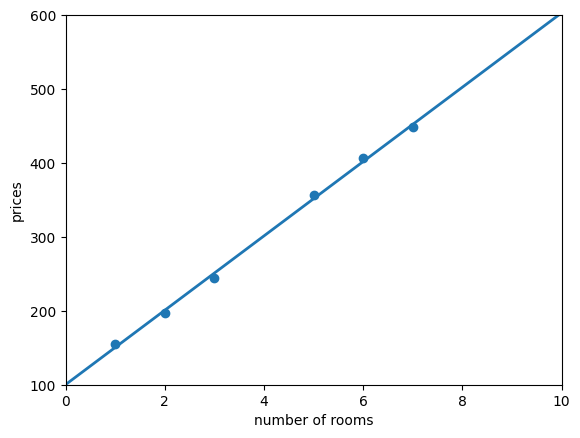

In [76]:
# check the progress of the training
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

TOTAL_FRAMES=100
frame_step_size = TOTAL_FRAMES
frames = np.logspace(0, np.log10(epochs), frame_step_size, dtype=np.uint32)
frames[:2] = 0

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(100, 600)
ax.scatter(features, labels)
ax.set_xlabel('number of rooms')
ax.set_ylabel('prices')
# ax.set_xlim(0, 2 * np.pi)
# ax.set_ylim(-1, 1)
line, = ax.plot([], [], lw=2)

def init():
  line.set_data([], [])
  return line,

def update(frame):
  # idx = min(epochs-1, (frame+1)*frame_step_size) # linear scale
  idx = min(epochs-1, frames[frame])
  # print(f"frame={frame}, index={idx}")
  x = np.linspace(0, 10, 1000)
  y = ms[idx] * x + bs[idx]
  line.set_data(x, y)
  return line,

ani = FuncAnimation(fig, update, frames=TOTAL_FRAMES, init_func=init, blit=True)
HTML(ani.to_jshtml())

# Generic Linear Regression
The general case will consists of a dataset of $m$ points and $n$ features.
* data points are $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$. Each point is a vector $x^{(i)}=\left(x_1^{i}, x_2^{i}, \ldots, x_n^{i} \right)$
* the corresponding labels are $y_1, y_2, \ldots, y_m$
* weights of the model are $w_1, w_2, \ldots, w_n$
* bias is $b$

Vectorised version of the above functions.

In [80]:
a=np.array([1,2,3])
b=np.array([2,3,4])
a.dot(b), a.shape

(20, (3,))

In [81]:
def general_square_trick(b, # scalar
                         x, # features dim: (n)
                         w, # weights dim: (n)
                         Y, # labels dim: scalar
                         lr):
  y_hat = w.dot(x) + b

  delta = (Y - y_hat) * lr # scalar

  b += delta
  w += x * delta # (n)

  return w, b

# linear regression algo using square trick
def general_linear_regression(X, # (m,n) a batch of x
                              Y, # (m) a batch of y
                              lr=0.01, epochs=1000):
  ws, bs = [], []
  m, n=X.shape
  w = np.random.rand(n)
  b = random.random()

  for epoch in range(epochs):
    i = random.randint(0, m-1) # random index of dataset
    x = X[i]
    y = Y[i]
    w, b = square_trick(b, w, x, y, lr)
    ws.append(w)
    bs.append(b)
  return ms, bs # price_per_room, base_price